# 지도학습 알고리즘 이론과 실습

In [15]:
import sys
sys.version 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import mglearn

import warnings
warnings.filterwarnings('ignore')

#그래프 한글깨짐오류
plt.rcParams['font.family'] = 'Malgun Gothic'

#그래프 마이너스 깨짐 오류
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

In [7]:
# !pip install sckit-learn
# !pip install pandas
# !pip install matplotlib
# !pip install mglearn

## 1. K-최근접 이웃 실습 (K-Nearest Neighbor)

### 1-1. 데이터 불러오기

In [47]:
from sklearn.datasets import load_breast_cancer
breast_cancer_data = load_breast_cancer()

df_data = pd.DataFrame(breast_cancer_data.data)
df_labels = pd.DataFrame(breast_cancer_data.target)
df_labels.head()

,0
0,0
1,0
2,0
3,0
4,0


In [48]:
print(breast_cancer_data.target_names)
df_data.head()

['malignant' 'benign']


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [49]:
df_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### 1-2. 정규화

In [50]:
def min_max_normalized(lst):
    normalized = []
    for value in lst:
        normalized_num = (value - min(lst)) / (max(lst) - min(lst))
        normalized.append(normalized_num)
    return normalized

for x in range(len(df_data.columns)):
    df_data[x] = min_max_normalized(df_data[x])
    
df_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,0.270379,...,0.296663,0.363998,0.283138,0.170906,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596
std,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,0.148702,...,0.171940,0.163813,0.167352,0.139932,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,0.163016,...,0.180719,0.241471,0.167837,0.081130,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700
50%,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,0.243892,...,0.250445,0.356876,0.235320,0.123206,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977
75%,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,0.340354,...,0.386339,0.471748,0.373475,0.220901,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 1-3. 데이터 세트 분리

In [51]:
from sklearn.model_selection import train_test_split

training_data, validation_data, training_labels, validation_labels = train_test_split(df_data, df_labels, test_size=0.2, random_state=100)
print(len(training_data))
print(len(validation_data))
print(len(training_labels))
print(len(validataion_labels))

455
114
455
114


### 1-4. 모델 생성

In [52]:
## KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(training_data,training_labels)

## 정확도
print(classifier.score(validation_data, validation_labels))

0.9649122807017544


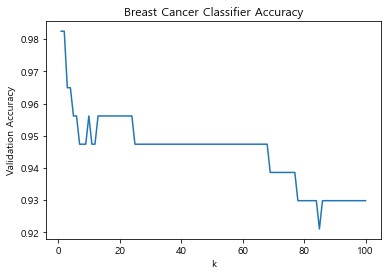

In [53]:
k_list = range(1,101)
accuracies = []
for k in k_list:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(training_data, training_labels)
    accuracies.append(classifier.score(validation_data, validation_labels))

plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Breast Cancer Classifier Accuracy")
plt.show()

## 2. 로지스틱회귀(Logistic Regression)

In [35]:
##데이터 불러오기
from sklearn.linear_model import LinearRegression
from sklearn import datasets

data = datasets.load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [37]:
##컬럼 선택
df = df[['mean radius', 'mean texture', 'mean area','mean symmetry']]
df['target'] = data.target
df

,mean radius,mean texture,mean area,mean symmetry,target
0,17.99,10.38,1001.0,0.2419,0
1,20.57,17.77,1326.0,0.1812,0
2,19.69,21.25,1203.0,0.2069,0
3,11.42,20.38,386.1,0.2597,0
4,20.29,14.34,1297.0,0.1809,0
...,...,...,...,...,...
564,21.56,22.39,1479.0,0.1726,0
565,20.13,28.25,1261.0,0.1752,0
566,16.60,28.08,858.1,0.1590,0
567,20.60,29.33,1265.0,0.2397,0


In [41]:
##스케일링
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=['mean radius', 'mean texture', 'mean area','mean symmetry','target'])
df

,mean radius,mean texture,mean area,mean symmetry,target
0,0.521037,0.022658,0.363733,0.686364,0.0
1,0.643144,0.272574,0.501591,0.379798,0.0
2,0.601496,0.390260,0.449417,0.509596,0.0
3,0.210090,0.360839,0.102906,0.776263,0.0
4,0.629893,0.156578,0.489290,0.378283,0.0
...,...,...,...,...,...
564,0.690000,0.428813,0.566490,0.336364,0.0
565,0.622320,0.626987,0.474019,0.349495,0.0
566,0.455251,0.621238,0.303118,0.267677,0.0
567,0.644564,0.663510,0.475716,0.675253,0.0


In [43]:
##데이터 나누기
from sklearn.model_selection import train_test_split

X = df[['mean radius', 'mean texture', 'mean area','mean symmetry']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

455
114
455
114


In [45]:
##모델 생성
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2')
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
##스코어
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy_score(y_pred, y_test)

0.9035087719298246

## 3. 나이브 베이즈 분류 (Naive Bayes Classification)

- 스팸 메일 필터, 텍스트 분류, 감정 분석, 추천 시스템 등 광범위하게 활용되는 분류 기법
- 지도학습의 일종 (feature 에 따라 label 을 분류하는데 베이즈 정리를 사용. 모든 feature는 서로 독립)
- 사전확률,사후확률 이용
- 베아즈 공식 : P(A|B) = P(B|A)P(B)/P(A)

In [54]:
##데이터 불러오기
tennis_data = pd.read_csv("Tennis_data.csv")
tennis_data

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [57]:
##데이터 변환
tennis_data.Outlook = tennis_data.Outlook.replace("Sunny", 0)
tennis_data.Outlook = tennis_data.Outlook.replace("Overcast", 1)
tennis_data.Outlook = tennis_data.Outlook.replace("Rain", 2)

tennis_data.Temperature = tennis_data.Temperature.replace("Hot", 3)
tennis_data.Temperature = tennis_data.Temperature.replace("Mild", 4)
tennis_data.Temperature = tennis_data.Temperature.replace("Cool", 5)

tennis_data.Humidity = tennis_data.Humidity.replace("High", 6)
tennis_data.Humidity = tennis_data.Humidity.replace("Normal", 7)

tennis_data.Wind = tennis_data.Wind.replace("Weak", 8)
tennis_data.Wind = tennis_data.Wind.replace("Strong", 9)

tennis_data.PlayTennis = tennis_data.PlayTennis.replace("No", 10)
tennis_data.PlayTennis = tennis_data.PlayTennis.replace("Yes", 11)

tennis_data

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,0,3,6,8,10
1,0,3,6,9,10
2,1,3,6,8,11
3,2,4,6,8,11
4,2,5,7,8,11
5,2,5,7,9,10
6,1,5,7,9,11
7,0,4,6,8,10
8,0,5,7,8,11
9,2,4,7,8,11


In [60]:
##데이터 나누기
X = np.array(pd.DataFrame(tennis_data, columns = ['Outlook','Temperature','Humidity','Wind']))
y = np.array(pd.DataFrame(tennis_data, columns=['PlayTennis']))
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [62]:
##모델 생성 및 예측
from sklearn.naive_bayes import GaussianNB
gnb_clf = GaussianNB()
gnb_clf = gnb_clf.fit(X_train, y_train)
gnb_prediction = gnb_clf.predict(X_test)
print(gnb_prediction)

[11 11 11 10]


In [67]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

print(confusion_matrix(y_test, gnb_prediction))

[[0 2]
 [1 1]]


In [66]:
print(classification_report(y_test, gnb_prediction))

              precision    recall  f1-score   support

          10       0.00      0.00      0.00         2
          11       0.33      0.50      0.40         2

    accuracy                           0.25         4
   macro avg       0.17      0.25      0.20         4
weighted avg       0.17      0.25      0.20         4



## 4. 서포트벡터머신(Support Vector Machine, SVM)
- 주어진 데이터가 어느 카테고리에 속할지 판단하는 이진 선형 분류 모델
- XO 구분선
- Margin의 최대화
    - Margin : 선과 가장 가까운 양 옆 데이터와의 거리이다. 즉, Margin은 구분하는 선과 서포트 벡터와의 거리를 의미함.
    - 서포트 벡터 : 선과 가장 가까운 포인트

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm, datasets
%matplotlib inline

iris = datasets.load_iris()
print(iris.keys())
print(iris.data.shape)
print(iris.feature_names)
print(iris.DESCR)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
  

In [83]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [113]:
x = iris.data[:, :2]
y = iris.target
SVM = svm.SVC(kernel ='linear', C=1).fit(x,y)

In [114]:
x_min, x_max = x[:, 0].min()-1, x[:,0].max()+1
y_min, y_max = x[:, 1].min()-1, x[:,1].max()+1
plot_unit = 0.025
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_unit), np.arange(y_min, y_max, plot_unit))

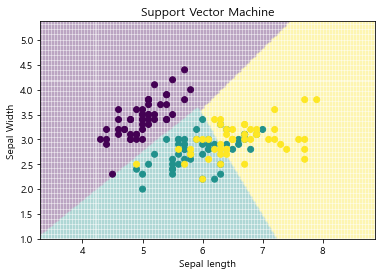

In [115]:
z = SVM.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.pcolormesh(xx, yy, z, alpha=0.1)
plt.scatter(x[:,0], x[:,1], c=y)

plt.xlabel('Sepal length')
plt.ylabel('Sepal Width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine')
plt.show()

In [110]:
print('정확도 :', SVM.score(X=x, y=y))

정확도 : 0.82


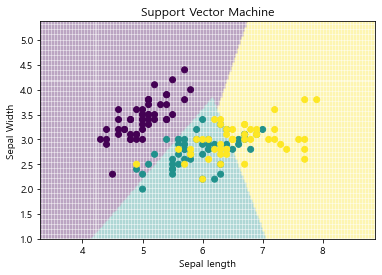

정확도 : 0.76


In [133]:
## SVC 파라미터 조정 1
X = iris.data[:, :2]
y = iris.target
SVM = svm.SVC(kernel ='linear', C=0.0002).fit(x,y)
x_min, x_max = x[:, 0].min()-1, x[:,0].max()+1
y_min, y_max = x[:, 1].min()-1, x[:,1].max()+1
plot_unit = 0.025
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_unit), np.arange(y_min, y_max, plot_unit))
z = SVM.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.pcolormesh(xx, yy, z, alpha=0.1)
plt.scatter(x[:,0], x[:,1], c=y)

plt.xlabel('Sepal length')
plt.ylabel('Sepal Width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine')
plt.show()

print('정확도 :', SVM.score(X=x, y=y))

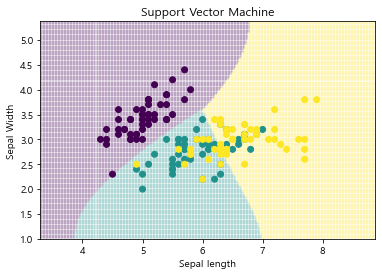

정확도 : 0.8266666666666667


In [135]:
## SVC 파라미터 조정 2
X = iris.data[:, :2]
y = iris.target
SVM = svm.SVC(kernel ='rbf', C=1).fit(x,y)
x_min, x_max = x[:, 0].min()-1, x[:,0].max()+1
y_min, y_max = x[:, 1].min()-1, x[:,1].max()+1
plot_unit = 0.025
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_unit), np.arange(y_min, y_max, plot_unit))
z = SVM.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.pcolormesh(xx, yy, z, alpha=0.1)
plt.scatter(x[:,0], x[:,1], c=y)

plt.xlabel('Sepal length')
plt.ylabel('Sepal Width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine')
plt.show()

print('정확도 :', SVM.score(X=x, y=y))

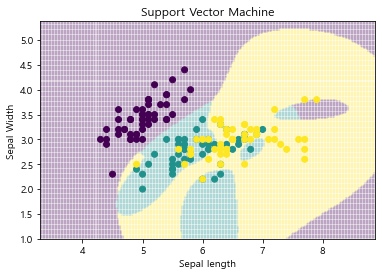

정확도 : 0.8533333333333334


In [136]:
## SVC 파라미터 조정 3
X = iris.data[:, :2]
y = iris.target
SVM = svm.SVC(kernel ='rbf', C=1000000).fit(x,y)
x_min, x_max = x[:, 0].min()-1, x[:,0].max()+1
y_min, y_max = x[:, 1].min()-1, x[:,1].max()+1
plot_unit = 0.025
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_unit), np.arange(y_min, y_max, plot_unit))
z = SVM.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.pcolormesh(xx, yy, z, alpha=0.1)
plt.scatter(x[:,0], x[:,1], c=y)

plt.xlabel('Sepal length')
plt.ylabel('Sepal Width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine')
plt.show()

print('정확도 :', SVM.score(X=x, y=y))

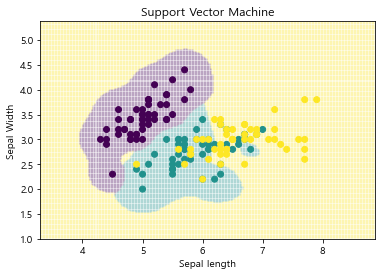

정확도 : 0.84


In [138]:
## SVC 파라미터 조정 4
X = iris.data[:, :2]
y = iris.target
SVM = svm.SVC(kernel ='rbf', C=1, gamma=10).fit(x,y)
x_min, x_max = x[:, 0].min()-1, x[:,0].max()+1
y_min, y_max = x[:, 1].min()-1, x[:,1].max()+1
plot_unit = 0.025
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_unit), np.arange(y_min, y_max, plot_unit))
z = SVM.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.pcolormesh(xx, yy, z, alpha=0.1)
plt.scatter(x[:,0], x[:,1], c=y)

plt.xlabel('Sepal length')
plt.ylabel('Sepal Width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine')
plt.show()

print('정확도 :', SVM.score(X=x, y=y))

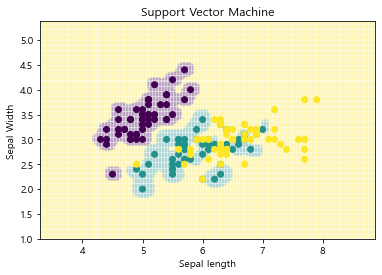

정확도 : 0.92


In [139]:
## SVC 파라미터 조정 5
X = iris.data[:, :2]
y = iris.target
SVM = svm.SVC(kernel ='rbf', C=1, gamma=100).fit(x,y)
x_min, x_max = x[:, 0].min()-1, x[:,0].max()+1
y_min, y_max = x[:, 1].min()-1, x[:,1].max()+1
plot_unit = 0.025
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_unit), np.arange(y_min, y_max, plot_unit))
z = SVM.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.pcolormesh(xx, yy, z, alpha=0.1)
plt.scatter(x[:,0], x[:,1], c=y)

plt.xlabel('Sepal length')
plt.ylabel('Sepal Width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine')
plt.show()

print('정확도 :', SVM.score(X=x, y=y))

## 5. 의사결정나무(Decision Tree)
- 스무고개 게임과 유사하며 확률을 이용해 Yes or No를 선택함.
- 1) 정보이득지수(Gain information)
    - 정보이득지수 = 1 - 엔트로피 지수
    - 정보이득이 높은 속성을 기준으로 분할
    - 엔트로피 : 데이터 집합의 혼잡도. 서로 다른 값이 섞여 있으면 엔트로피가 높고, 같은 값이 섞여 있으면 엔트로피가 낮음
- 2) 지니계수 (Gini Index)
    - 불평등 지수를 나타내는 계수
    - 0일 때 가장 평등하고, 1로 갈수록 불평등
    - 지니 계수가 낮은 속성을 기준으로 분할
    - 사이킷런 DecisionTreeClassifier은 기본으로 지니계수를 이용해 분할

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

tennis_data

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,0,3,6,8,10
1,0,3,6,9,10
2,1,3,6,8,11
3,2,4,6,8,11
4,2,5,7,8,11
5,2,5,7,9,10
6,1,5,7,9,11
7,0,4,6,8,10
8,0,5,7,8,11
9,2,4,7,8,11


In [141]:
##데이터 나누기
X = np.array(pd.DataFrame(tennis_data, columns = ['Outlook','Temperature', 'Humidity', 'Wind']))
y = np.array(pd.DataFrame(tennis_data, columns = ['PlayTennis']))

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [142]:
##모델 생성
dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(X_train, y_train)
dt_prediction = dt_clf.predict(X_test)
print(confusion_matrix(y_test, dt_prediction))

[[1 0]
 [2 1]]


In [143]:
print(classification_report(y_test, dt_prediction))

              precision    recall  f1-score   support

          10       0.33      1.00      0.50         1
          11       1.00      0.33      0.50         3

    accuracy                           0.50         4
   macro avg       0.67      0.67      0.50         4
weighted avg       0.83      0.50      0.50         4



In [144]:
dt_clf_model_text = tree.export_text(dt_clf)
print(dt_clf_model_text)

|--- feature_0 <= 0.50
|   |--- class: 10
|--- feature_0 >  0.50
|   |--- feature_3 <= 8.50
|   |   |--- class: 11
|   |--- feature_3 >  8.50
|   |   |--- feature_0 <= 1.50
|   |   |   |--- class: 11
|   |   |--- feature_0 >  1.50
|   |   |   |--- class: 10

